Hi Dr. Lurio,

Here are the most important files from Friday. T

The serial1_data had a resistance of 1 megaohm and measured the voltage across the capacitor without solution.

The serial16 data was for the voltage when there is the sugar solution at one megaohm.

The serial data 19 was just the Arduino running without being attached to the capacitor. I think you said this was where there was some internal capacitance.

Serial data 14 was the capacitor discharging without solution at 10 megaohm resistance.

Disregard the first 5 trials for almost all the data, because that is where we added the measure of the first 5 voltages without starting the discharge.

The other files are repeats of the same conditions.

In [3]:
import numpy as np
import scipy.constants as scc
from matplotlib import pyplot as plt
import numpy as np
import scipy.constants as scc
import pandas as pd 
from IPython.display import display
from PIL import Image
import os


In [4]:
fns = os.listdir()
fns2 = [fn for fn in fns if ".csv" in fn]
print(fns2)

['Capacitance1.csv', 'Capacitance2.csv', 'New measurements.csv', 'serial14_data.csv', 'serial16_data1megaohm.csv', 'serial19_data.csv', 'serial1_data.csv']


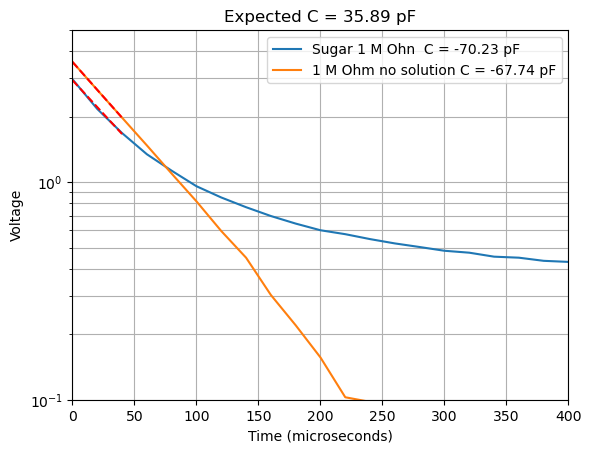

In [37]:
names =  ['serial16_data1megaohm.csv', 'serial1_data.csv']
lbls = ["Sugar 1 M Ohn ","1 M Ohm no solution"]
start_index = np.array([4,0])
R = 1*scc.mega
dt = 20*scc.micro
for first,lbl,name in zip(start_index,lbls,names):
    fn = name
    df = pd.read_csv(fn)
    V = df["Voltage (V)"].to_numpy()
    # Fit linear slope
    last = first+3
    xx = np.arange(last-first)

    [m,b] = np.polyfit(xx*dt, np.log(V[first:last]), 1)
    C = (1/m)/R
    lbl = lbl + f' C = {C/scc.pico:4.2f} pF'
    time = np.arange(len(V[first:]))*dt
    plt.plot(time/scc.micro, V[first:],label=lbl)
    plt.plot(xx*dt/scc.micro,np.exp(m*xx*dt+b),'--r')
plt.legend()
plt.yscale('log')
plt.xscale('linear')
plt.xlim(0,20*dt/scc.micro)
plt.ylim(.1,5)
plt.ylabel('Voltage')
plt.xlabel('Time (microseconds)')
A = np.pi*(1*scc.inch)**2
d = .5*scc.milli
C_expected = scc.epsilon_0*A/d
plt.title(f'Expected C = {C_expected/scc.pico:5.2f} pF')
plt.grid(True, which='minor')
plt.grid(True, which='major')


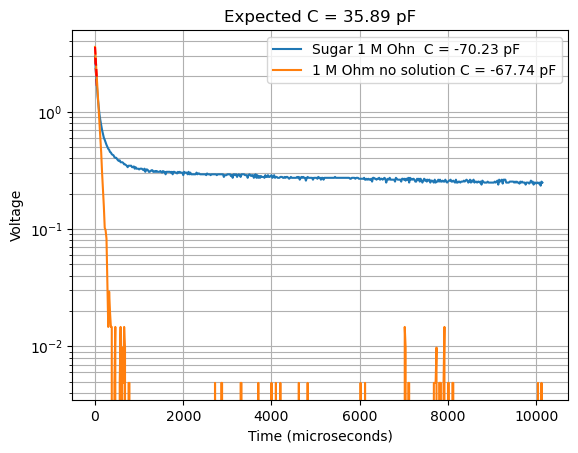

In [38]:
for first,lbl,name in zip(start_index,lbls,names):
    fn = name
    df = pd.read_csv(fn)
    V = df["Voltage (V)"].to_numpy()
    # Fit linear slope
    last = first+3
    xx = np.arange(last-first)

    [m,b] = np.polyfit(xx*dt, np.log(V[first:last]), 1)
    C = (1/m)/R
    lbl = lbl + f' C = {C/scc.pico:4.2f} pF'
    time = np.arange(len(V[first:]))*dt
    plt.plot(time/scc.micro, V[first:],label=lbl)
    plt.plot(xx*dt/scc.micro,np.exp(m*xx*dt+b),'--r')
plt.legend()
plt.yscale('log')
plt.xscale('linear')
plt.ylabel('Voltage')
plt.xlabel('Time (microseconds)')
A = np.pi*(1*scc.inch)**2
d = .5*scc.milli
C_expected = scc.epsilon_0*A/d
plt.title(f'Expected C = {C_expected/scc.pico:5.2f} pF')
plt.grid(True, which='minor')
plt.grid(True, which='major')